Dieses Jupyter Notebook wurde von Lisa Tawockli und Ruslan Adilgereev im Rahmen  des Moduls "Maschinelles Lernen" erstellt. Es basiert auf dem Datensatz "wbdc_5.csv", der Merkmale aus Bildern einer Feinnadelbiopsie von Brusttumoren umfasst. Das Hauptziel dieses Projekts ist die Entwicklung eines präzisen Modells zur Klassifizierung von Brusttumoren in zwei Kategorien: gutartig (benign) und bösartig (malignant).

Um dieses Ziel zu erreichen, werden folgende maschinelle Lernalgorithmen angewendet und hinsichtlich ihrer Leistungsfähigkeit bewertet:
Multilayer Perceptron (MLP)
Entscheidungsbaum (Decision Tree)
Support Vector Machine (SVM)

In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import name


In [194]:
data = pd.read_csv('wbdc_5.csv')  # load data
data.head() # Ausgabe der Dimension des Datensatzes


ID Diagnosis  radius1  texture1  perimeter1  area1  compactness1  \
0   897374         B    12.30     19.02       77.88  464.4       0.04202   
1  8910251         B    10.60     18.95       69.28  346.4       0.11470   
2   854941         B    13.03     18.42       82.61  523.8       0.03766   
3    89869         B    14.76     14.74       94.87  668.7       0.07780   
4  9113538         M    17.60     23.33      119.00  980.5       0.20040   

   concavity1  concave_points1  symmetry1  ...  fractal_dimension2  radius3  \
0    0.007756         0.008535     0.1539  ...            0.002222    13.35   
1    0.063870         0.026420     0.1922  ...            0.003318    11.88   
2    0.025620         0.029230     0.1467  ...            0.001777    13.30   
3    0.046080         0.035280     0.1521  ...            0.002783    17.27   
4    0.213600         0.100200     0.1696  ...            0.011300    21.57   

   texture3  perimeter3   area3  compactness3  concavity3  concave_points3  \
0     28.46       84.53   544.3       0.09052     0.03619          0.03983   
1     22.94       78.28   424.8       0.25150     0.19160          0.07926   
2     22.81       84.46   545.9       0.04619     0.04833          0.05013   
3     17.93      114.20   880.8       0.20090     0.21510          0.12510   
4     28.87      143.60  1437.0       0.47850     0.51650          0.19960   

   symmetry3  fractal_dimension3  
0     0.2554             0.07207  
1     0.2940             0.07587  
2     0.1987             0.06169  
3     0.3109             0.08187  
4     0.2301             0.12240  

[5 rows x 29 columns]

In [195]:
print(data.shape)
print(data.describe())
print(data.info())
print(data['Diagnosis'].value_counts())
print(data.duplicated().sum())
print(data.unique())

(501, 29)
                 ID     radius1    texture1  perimeter1        area1  \
count  5.010000e+02  501.000000  501.000000  501.000000   501.000000   
mean   3.054487e+07   14.209036   19.198802   92.478323   661.344311   
std    1.266249e+08    3.510540    4.301340   24.154774   349.835088   
min    8.670000e+03    6.981000    9.710000   43.790000   143.500000   
25%    8.694760e+05   11.760000   16.150000   76.090000   427.300000   
50%    9.062900e+05   13.400000   18.800000   86.600000   553.500000   
75%    8.860702e+06   16.030000   21.680000  105.100000   797.800000   
max    9.113205e+08   28.110000   39.280000  188.500000  2499.000000   

       compactness1  concavity1  concave_points1   symmetry1  \
count    501.000000  501.000000       501.000000  501.000000   
mean       0.103989    0.088399         0.049339    0.181232   
std        0.051752    0.078738         0.038679    0.027541   
min        0.019380    0.000000         0.000000    0.106000   
25%        0.066300  

AttributeError: 'numpy.ndarray' object has no attribute 'unique'

In [ ]:
data.dropna(axis=0)  # entfernen von Daten mit fehlenden Werten
data.drop_duplicates()  # entfernen von Duplikaten

# 1 for Malignant, 0 for Benign
data["Diagnosis"] = data["Diagnosis"].map({"B": 0, "M":1})

### Features
Der vorliegende Datensatz beinhaltet 29 Spalten. Davon ist eine Spalte "ID" kein Features und die Spalte "Diagnosis" gilt es vorherzusagen, sodass der Datensatz 27 potentielle Features hat.

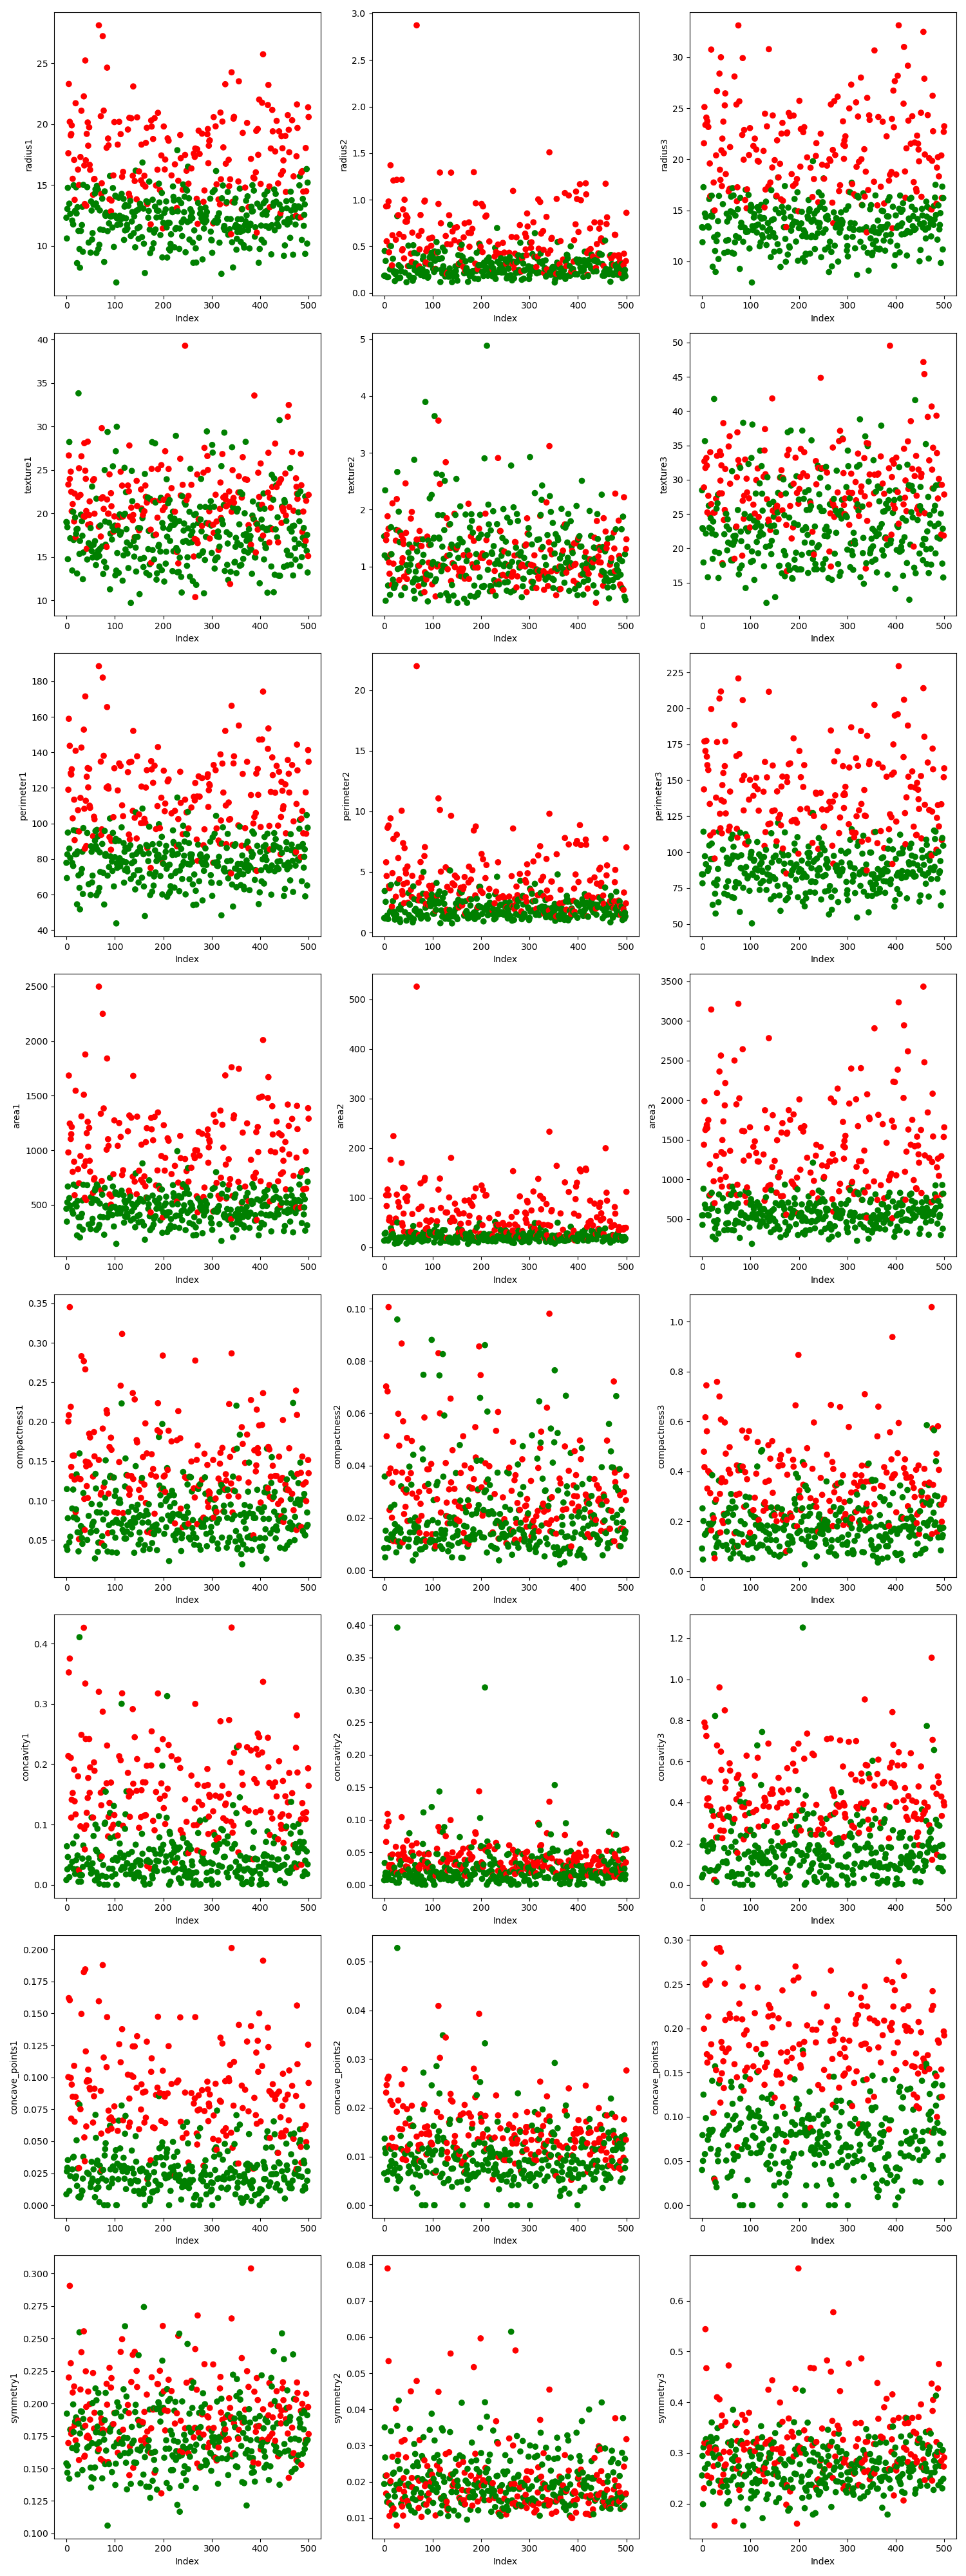

In [ ]:
# Aufteilen der Daten in Features und Labels
# Markiere die jeweiligen Datenpunkte als gutartig (blau) oder bösartig (rot)
colors = {1: 'red', 0: 'green'}
features = data.columns[2:10]  # Liste der Feature-Namen	

# Initialisiere das Subplot-Grid mit 3 Spalten und so vielen Zeilen wie nötig für die Features.
num_features = len(features)
num_columns = 3
num_rows = (num_features*3 + num_columns - 1) // num_columns  # Berechnet die Mindestanzahl an benötigten Zeilen.

# Erstelle eine Figur und ein Array von Achsen.
fig, axs = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))  # Die Figurgröße kann angepasst werden.

# Flache Liste der Achsen für einfacheren Zugriff.
axs = axs.flatten()

# Gehe durch die Liste der Features und erstelle die Scatterplots.
for i, feature in enumerate(features):
    feature = feature[:-1]  # Entferne das letzte Zeichen des Feature-Namens.
    for j in range(1, 4):
        ax = axs[i * num_columns + j - 1]  # Wähle die richtige Achse für den aktuellen Subplot.
        ax.scatter(data.index, data[feature + str(j)], c=data['Diagnosis'].apply(lambda x: colors[x]))
        ax.set_xlabel('Index')
        ax.set_ylabel(feature + str(j))

# Anpassen des Layouts, damit die Beschriftungen nicht überlappen.
plt.tight_layout()
plt.show()


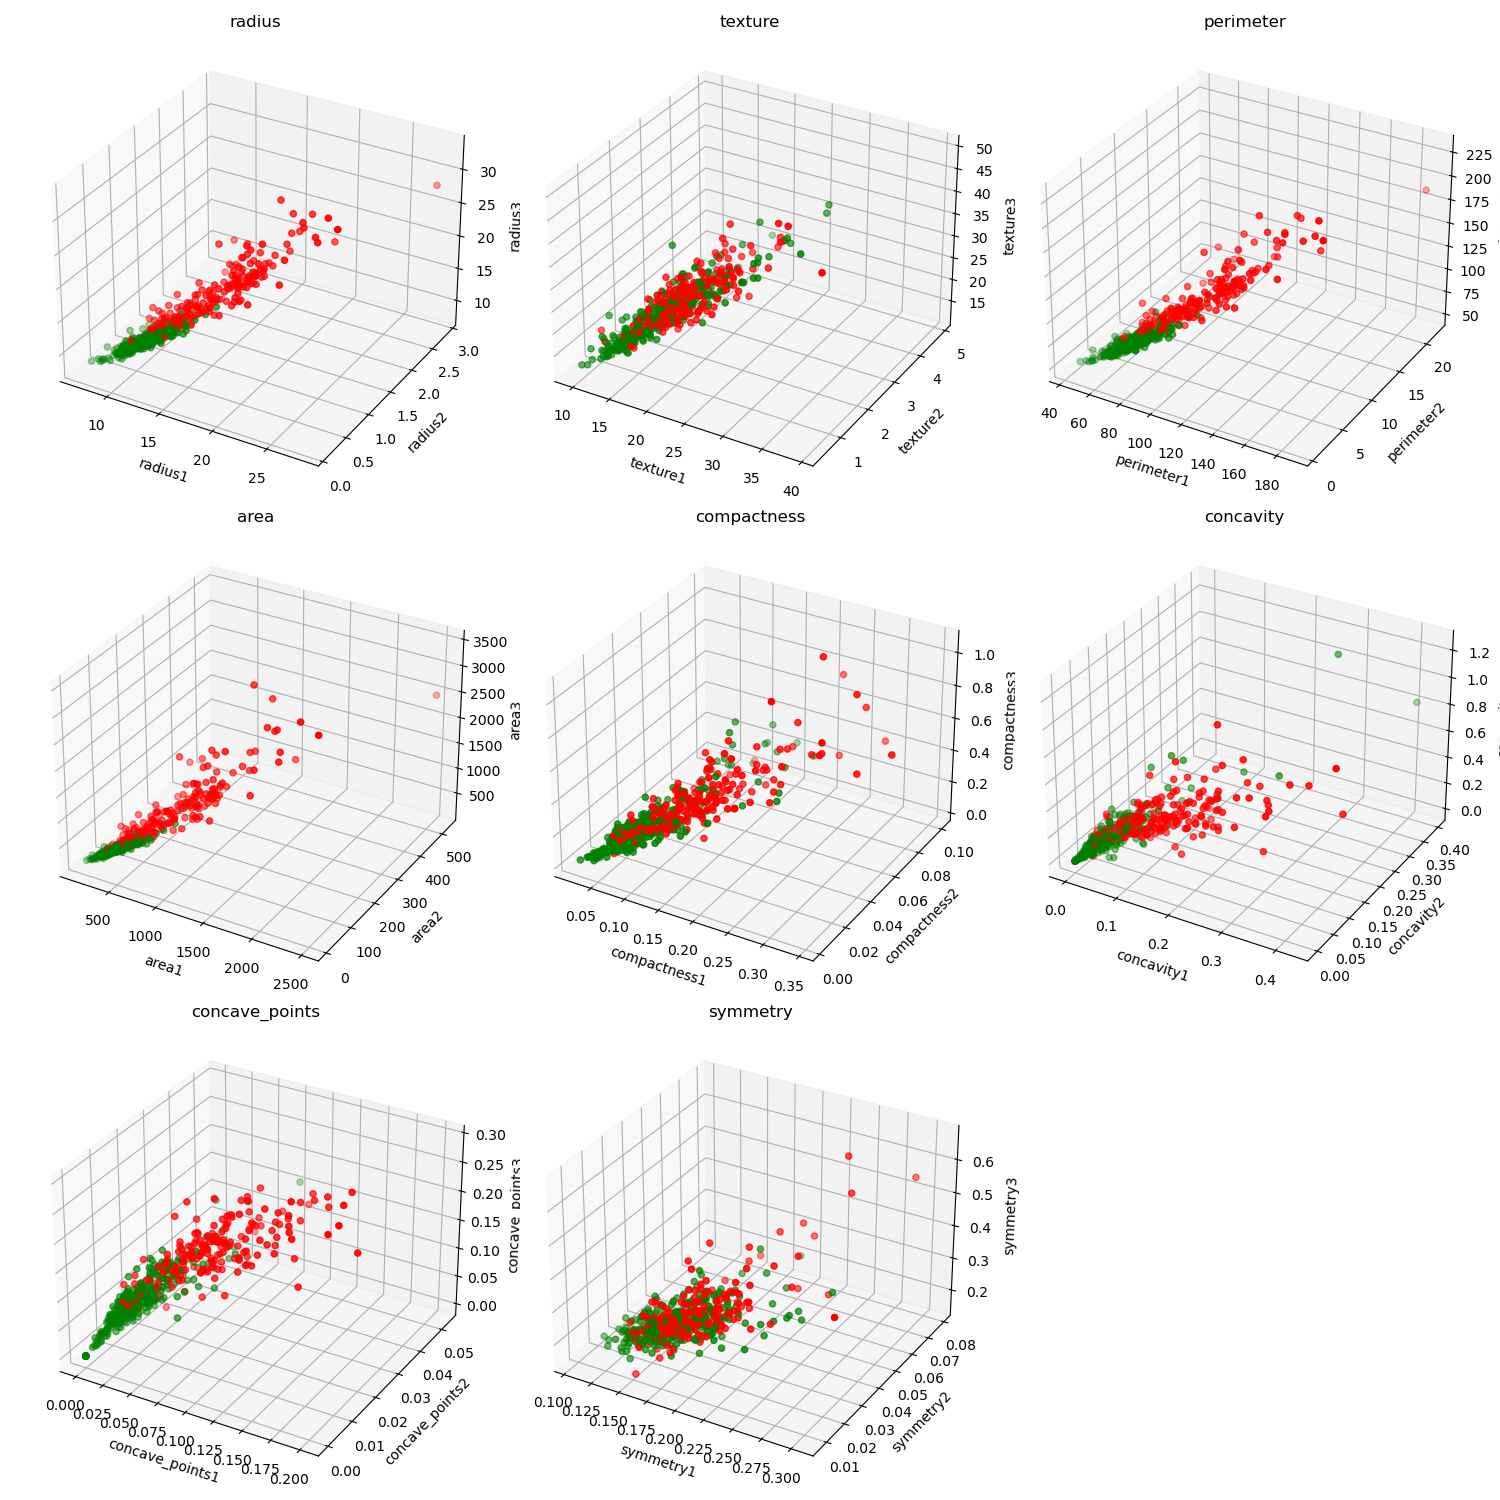

In [ ]:
# Annahme, dass 'data' Ihr DataFrame und 'features' eine Liste der Feature-Namen ist
%matplotlib widget

# Berechnung der Dimensionen des Subplot-Grids
rows = int(np.ceil(len(features) / 3))  # Anpassung für 3 Spalten
fig = plt.figure(figsize=(15, 5 * rows))  # Anpassung der Gesamtgröße der Figur

for i, feature in enumerate(features):
    feature = feature[:-1]  # delete last string of feature
    x = data[feature+"1"].to_numpy()
    y = data[feature+"2"].to_numpy()
    z = data[feature+"3"].to_numpy()

    # Erstellung eines Subplots innerhalb eines Rasters
    ax = fig.add_subplot(rows, 3, i+1, projection='3d')

    # Scatterplot für aktuelles Feature
    ax.scatter(x, y, z, c=data['Diagnosis'].apply(lambda x: colors[x]), marker='o')
    ax.set_xlabel(feature+"1")
    ax.set_ylabel(feature+"2")
    ax.set_zlabel(feature+"3")
    ax.set_title(feature)  # Hinzufügen eines Titels für Klarheit

plt.tight_layout()  # Verbessert die Anordnung der Plots
plt.show()


In [ ]:

X = data.iloc[:, 2:]  # Features sind die Spalten 3 bis n
y = data["Diagnosis"]  # Target ist die Spalte 2

# Aufteilen der Daten in Trainings- und Testdaten
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Für die Vergleichbarkeit der Performance des Modells werden die Daten skaliert, normiert und unverändert verglichen
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

# Normalisierung der Daten
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [ ]:
# Anwenden des MLP Modells
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Modell mit Standarddaten
mlp_orig = MLPClassifier(hidden_layer_sizes=(30, 30, 30), max_iter=1000)
mlp_orig.fit(X_train, y_train)
predictions = mlp_orig.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

# Modell mit skalierten Daten
mlp_scale = MLPClassifier(hidden_layer_sizes=(30, 30, 30), max_iter=1000)
mlp_scale.fit(X_train_scale, y_train)
predictions = mlp_scale.predict(X_test_scale)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

# Modell mit normalisierten Daten
mlp_norm = MLPClassifier(hidden_layer_sizes=(30, 30, 30), max_iter=1000)
mlp_norm.fit(X_train_norm, y_train)
predictions = mlp_norm.predict(X_test_norm)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


ValueError: Unknown label type: (array([0.01013 , 0.01263 , 0.0371  , 0.01921 , 0.01208 , 0.03004 ,
       0.01302 , 0.01344 , 0.01054 , 0.05543 , 0.0156  , 0.01829 ,
       0.01916 , 0.01329 , 0.02837 , 0.01254 , 0.0148  , 0.0155  ,
       0.03156 , 0.01959 , 0.01578 , 0.02105 , 0.01069 , 0.03672 ,
       0.01755 , 0.01894 , 0.01536 , 0.01501 , 0.02789 , 0.01798 ,
       0.0222  , 0.01482 , 0.05628 , 0.0172  , 0.02105 , 0.01842 ,
       0.04022 , 0.02689 , 0.01394 , 0.01798 , 0.04197 , 0.01386 ,
       0.03433 , 0.01316 , 0.03003 , 0.01093 , 0.0187  , 0.01938 ,
       0.02108 , 0.02175 , 0.01129 , 0.02674 , 0.01177 , 0.01454 ,
       0.03218 , 0.02163 , 0.02751 , 0.02335 , 0.02427 , 0.0274  ,
       0.02401 , 0.02085 , 0.02747 , 0.01651 , 0.0203  , 0.007882,
       0.07895 , 0.01581 , 0.01715 , 0.01318 , 0.0152  , 0.01251 ,
       0.01528 , 0.02566 , 0.01756 , 0.01719 , 0.03082 , 0.01202 ,
       0.01745 , 0.03139 , 0.01958 , 0.02571 , 0.01594 , 0.02897 ,
       0.01884 , 0.03357 , 0.04783 , 0.02258 , 0.0203  , 0.01295 ,
       0.01743 , 0.01816 , 0.01315 , 0.02451 , 0.01535 , 0.01998 ,
       0.0168  , 0.01884 , 0.01449 , 0.02542 , 0.02591 , 0.01226 ,
       0.01371 , 0.02545 , 0.05963 , 0.01547 , 0.01544 , 0.01526 ,
       0.02653 , 0.02734 , 0.03476 , 0.01152 , 0.01791 , 0.01465 ,
       0.01447 , 0.02086 , 0.03416 , 0.02009 , 0.02165 , 0.01065 ,
       0.03265 , 0.03112 , 0.02175 , 0.01718 , 0.017   , 0.01263 ,
       0.01564 , 0.03127 , 0.01536 , 0.01835 , 0.02434 , 0.01523 ,
       0.01442 , 0.01977 , 0.01117 , 0.01792 , 0.01498 , 0.01875 ,
       0.01574 , 0.01354 , 0.01568 , 0.01278 , 0.01415 , 0.02308 ,
       0.02659 , 0.03232 , 0.0152  , 0.0122  , 0.0138  , 0.0286  ,
       0.02045 , 0.01411 , 0.03491 , 0.0149  , 0.0159  , 0.01948 ,
       0.01738 , 0.02282 , 0.02294 , 0.01561 , 0.01608 , 0.019   ,
       0.0187  , 0.01934 , 0.01844 , 0.02625 , 0.02008 , 0.03675 ,
       0.02134 , 0.01724 , 0.01713 , 0.02279 , 0.01872 , 0.02694 ,
       0.02632 , 0.01414 , 0.01145 , 0.01344 , 0.01359 , 0.01414 ,
       0.01609 , 0.01083 , 0.01731 , 0.01451 , 0.02124 , 0.01982 ,
       0.01678 , 0.01807 , 0.01435 , 0.01172 , 0.01275 , 0.01824 ,
       0.01357 , 0.04484 , 0.02168 , 0.01428 , 0.02087 , 0.01247 ,
       0.01669 , 0.0156  , 0.031   , 0.02678 , 0.01492 , 0.03373 ,
       0.02266 , 0.03197 , 0.02154 , 0.02337 , 0.01347 , 0.01647 ,
       0.01961 , 0.0271  , 0.01518 , 0.02768 , 0.01857 , 0.01848 ,
       0.01938 , 0.01285 , 0.01816 , 0.01254 , 0.01543 , 0.01898 ,
       0.01996 , 0.01494 , 0.01323 , 0.01989 , 0.01454 , 0.01924 ,
       0.01924 , 0.01422 , 0.01962 , 0.01391 , 0.02574 , 0.01748 ,
       0.0221  , 0.02277 , 0.01843 , 0.01171 , 0.02292 , 0.01325 ,
       0.0174  , 0.02736 , 0.01467 , 0.01227 , 0.01719 , 0.01503 ,
       0.009947, 0.01898 , 0.01972 , 0.02287 , 0.02045 , 0.01673 ,
       0.01215 , 0.04192 , 0.01782 , 0.01695 , 0.02572 , 0.02354 ,
       0.03997 , 0.009539, 0.0388  , 0.01641 , 0.02572 , 0.01698 ,
       0.01467 , 0.02349 , 0.01801 , 0.0158  , 0.02793 , 0.01689 ,
       0.03546 , 0.01677 , 0.01601 , 0.02578 , 0.01536 , 0.02676 ,
       0.01623 , 0.02201 , 0.03044 , 0.02094 , 0.01461 , 0.03756 ,
       0.01608 , 0.02475 , 0.01266 , 0.02769 , 0.01502 , 0.03397 ,
       0.02728 , 0.02102 , 0.02152 , 0.01778 , 0.01924 , 0.02079 ,
       0.01799 , 0.01675 , 0.01237 , 0.01341 , 0.01144 , 0.01488 ,
       0.03799 , 0.02293 , 0.01703 , 0.01694 , 0.01522 , 0.01547 ,
       0.02273 , 0.01897 , 0.01939 , 0.01897 , 0.01772 , 0.0158  ,
       0.01495 , 0.0212  , 0.02593 , 0.015   , 0.01805 , 0.01953 ,
       0.03464 , 0.01671 , 0.03504 , 0.01635 , 0.02514 , 0.01388 ,
       0.01602 , 0.02639 , 0.01639 , 0.02027 , 0.01925 , 0.01829 ,
       0.021   , 0.02187 , 0.02662 , 0.01789 , 0.01878 , 0.01445 ,
       0.01487 , 0.01055 , 0.02018 , 0.02057 , 0.01616 , 0.01394 ,
       0.01365 , 0.0225  , 0.01956 , 0.03759 , 0.02816 , 0.01539 ,
       0.01522 , 0.01397 , 0.01909 , 0.0188  , 0.01613 , 0.01942 ,
       0.01367 , 0.01575 , 0.02951 , 0.02057 , 0.02637 , 0.01619 ,
       0.02025 , 0.01852 , 0.01468 , 0.02309 , 0.03056 , 0.01095 ,
       0.01759 , 0.01466 , 0.01332 , 0.04183 , 0.02144 , 0.02981 ,
       0.02353 , 0.02669 , 0.02091 , 0.02043 , 0.01465 , 0.01838 ,
       0.01356 , 0.01717 , 0.01298 , 0.02032 , 0.02912 , 0.02193 ,
       0.01393 , 0.01369 , 0.01333 , 0.01377 , 0.0175  , 0.01282 ,
       0.03418 , 0.03176 , 0.02254 , 0.02773 , 0.01276 , 0.01069 ,
       0.01419 , 0.0184  , 0.01477 , 0.0208  ]),)